<a href="https://colab.research.google.com/github/thekateee23/cs102/blob/homework06/Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [1]:
import pandas as pd

df = pd.read_csv("/content/music_genre.csv")

In [2]:
df = df.sample(n=20000, random_state=42)

In [3]:
duplicates = df[df.duplicated()]

if len(duplicates) > 0:
    df.drop_duplicates(inplace=True)

In [4]:
empty_artist = df[df["artist_name"] == "empty_field"]
if not empty_artist.empty:
    #print("Строки с пустыми значениями в столбце artist_name:")
    #print(empty_artist)
    print("Количество строк: ", len(empty_artist))
else:
    print("Нет строк с пустыми значениями в столбце artist_name")

df = df[df["artist_name"] != "empty_field"]

Количество строк:  975


**Вывод:**
По сути сделала предобработку данных: загрузила датасет, проверила на наличие дубликатов

Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

In [5]:
genre_counts = df['music_genre'].value_counts(normalize=True)
print(genre_counts)

Electronic     0.102923
Anime          0.101924
Rap            0.100662
Hip-Hop        0.100347
Blues          0.099611
Jazz           0.099138
Alternative    0.099085
Classical      0.099085
Country        0.098665
Rock           0.098560
Name: music_genre, dtype: float64


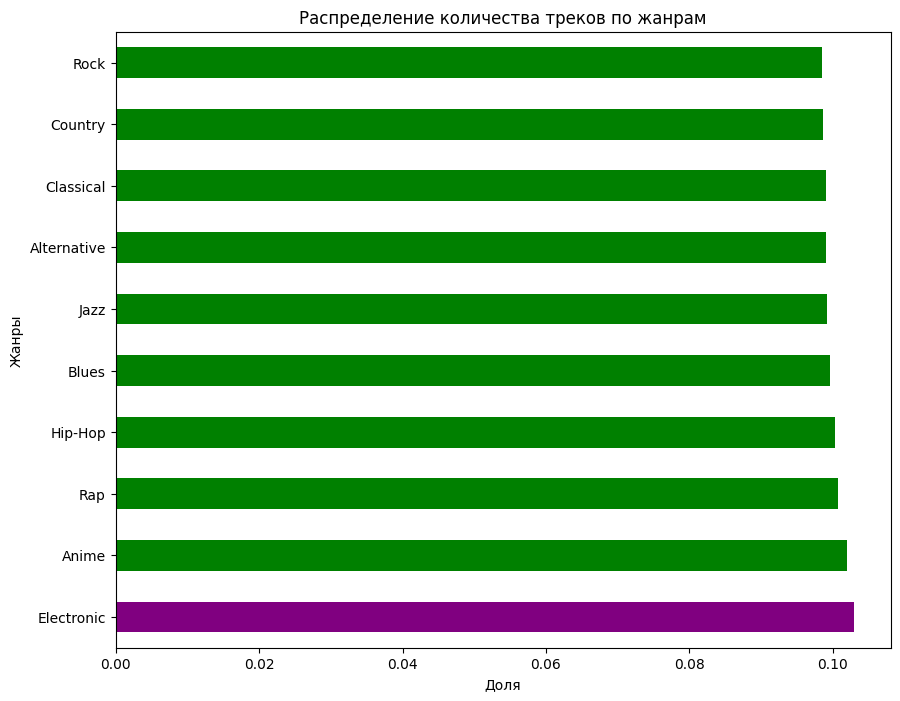

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
genre_counts.plot.barh(color=['green' if x != genre_counts.idxmax() else 'purple' for x in genre_counts.index])
plt.xlabel('Доля')
plt.ylabel('Жанры')
plt.title('Распределение количества треков по жанрам')
plt.show()

In [7]:
danceability_by_genre = df.groupby('music_genre')['danceability'].mean()
print(danceability_by_genre.idxmax())

Hip-Hop


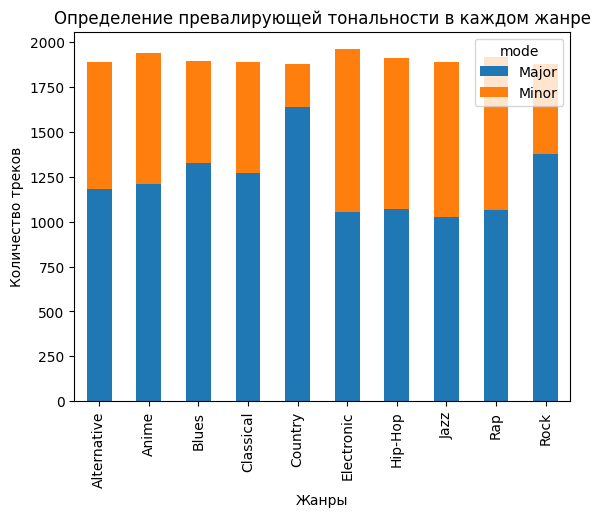

In [8]:
grouped = df.groupby(['music_genre', 'mode'])['instance_id'].count().reset_index()

pivot = pd.pivot_table(grouped, values='instance_id', index='music_genre', columns='mode', aggfunc='sum')

pivot.plot(kind='bar', stacked=True)
plt.title("Определение превалирующей тональности в каждом жанре")
plt.xlabel("Жанры")
plt.ylabel("Количество треков")
plt.show()

**Вывод:**
Нашла долю каждого жанра, больше всего песен у жанра ***электронная музыка***, наиболее танцевальным жанром является ***хип-хоп***, определила превалирующие тональности в каждом из жанров.

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

In [9]:
most_tracks = df['artist_name'].value_counts().nlargest(1)
print('Исполнитель с наибольшим количеством треков:', most_tracks.index[0], '(', most_tracks.values[0], ' треков)')

Исполнитель с наибольшим количеством треков: Nobuo Uematsu ( 185  треков)


In [10]:
smallest = df['artist_name'].value_counts().nsmallest(1)
print('Исполнитель с наименьшим количеством треков:', smallest.index[0], '(', smallest.values[0], ' трек)')

Исполнитель с наименьшим количеством треков: Franz Danzi ( 1  трек)


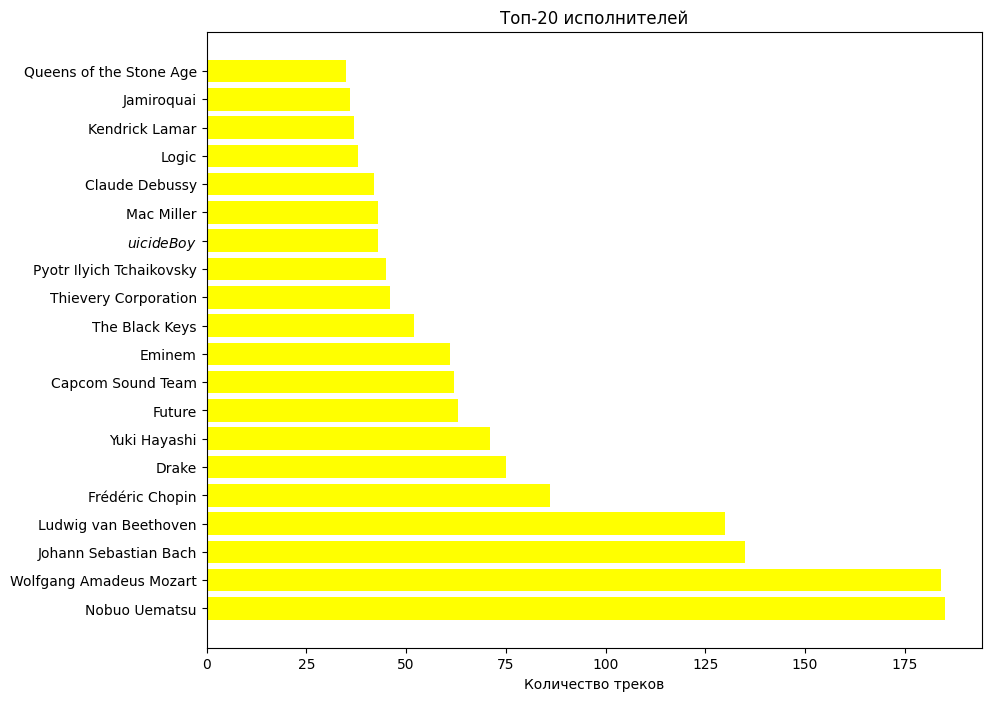

In [11]:
import matplotlib.pyplot as plt

top_artists = df['artist_name'].value_counts().nlargest(20)
plt.figure(figsize=(10,8))
plt.barh(top_artists.index, top_artists.values, color='yellow')
plt.xlabel('Количество треков')
plt.title('Топ-20 исполнителей')
plt.show()

**Вывод:**
Наименьшее количество треков у Franz Danzi ( 1  трек), наибольшее количество треков у Nobuo Uematsu ( 185  треков).

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

<ipython-input-12-0a8087d3fcbf>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

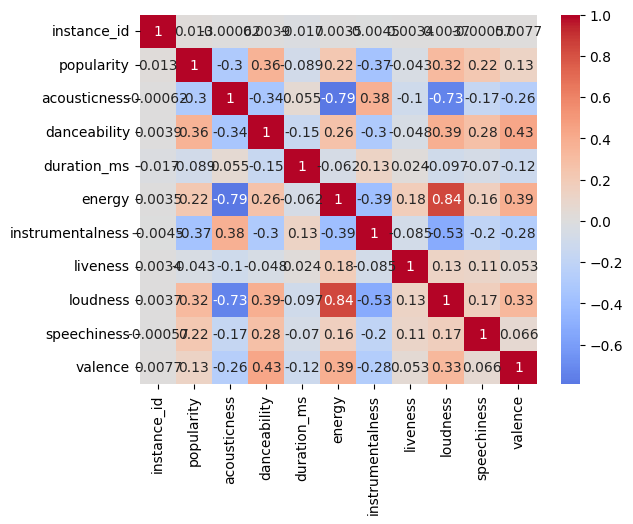

In [12]:
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True)

In [13]:
df["track_name_length"] = df["track_name"].apply(lambda x: len(str(x)))

correlation = df["popularity"].corr(df["track_name_length"])

print("Корреляция между популярностью и длиной названия трека: ", correlation)

Корреляция между популярностью и длиной названия трека:  -0.2131970478431408


**Вывод:**
1) По диагонали у нас стоят единицы, и в теории это сильная корреляция, но по факту это пересечение элементов с самими собой, соответственно, они не релевантны для нас.
Сильная корреляция: громкость + энергичность; танцевальность + настроение; энергичность + настроение; популярность + танцевальность.
Слабая корреляция: энергичность + акустичность; громкость + инструментальность; инструментальность + популярность.
2) корреляция между популярностью и длиной трека слабая.

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

<Figure size 1200x800 with 0 Axes>

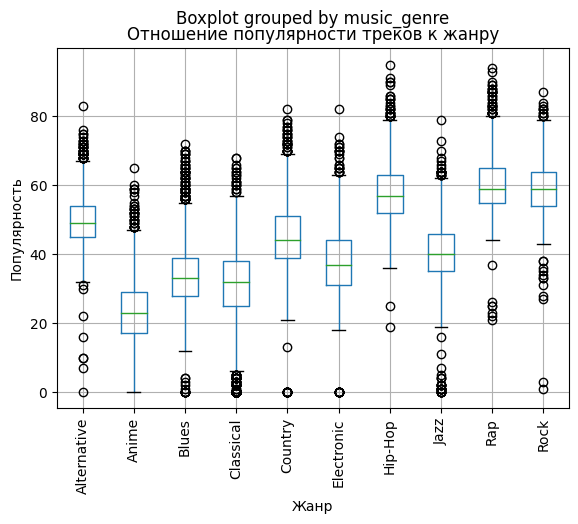

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
df.boxplot(column='popularity', by='music_genre', rot=90)
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.title('Отношение популярности треков к жанру')
plt.show()

**Вывод:**
Построила диаграмму "Ящик с усами", проанализировала его и выявила наиболее популярный жанр: ***рэп***. В целом похожи между собой рок, рэп и хипхоп, классика и блюз.

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

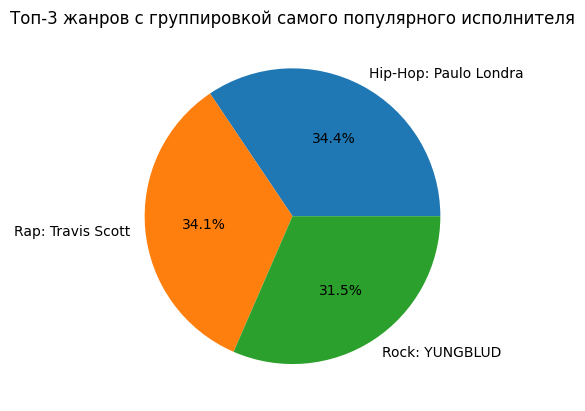

In [37]:
import matplotlib.pyplot as plt
top_genres = df.groupby('music_genre')['popularity'].sum().nlargest(3).index.tolist()

grouped_data = df.groupby('music_genre').apply(lambda x: x[x['popularity'] == x['popularity'].max()])

filtered_data = grouped_data[grouped_data.index.get_level_values(0).isin(top_genres)]

artist_data = filtered_data.groupby('artist_name')['popularity'].sum().reset_index()

top_artists = artist_data[artist_data['artist_name'].isin(filtered_data['artist_name'].unique())].sort_values('popularity', ascending=False).groupby('artist_name').head(1)['artist_name'].tolist()

filtered_data = filtered_data[filtered_data['music_genre'].isin(top_genres) & filtered_data['artist_name'].isin(top_artists)]

plt.pie(filtered_data['popularity'], labels=filtered_data['music_genre'] + ': ' + filtered_data['artist_name'], autopct='%1.1f%%')
plt.title('Топ-3 жанров с группировкой самого популярного исполнителя')
plt.show()

Вывод:построила диаграмму популярности топ-3 исполнителей; *хипхоп - Paulo Londra, рэп - Travis Scott, рок - YUNGBLUD*.

### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

<ipython-input-16-62e385ad96c4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  popular_genres = df.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).head(1)
<ipython-input-16-62e385ad96c4>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unpopular_genres = df.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).tail(1)


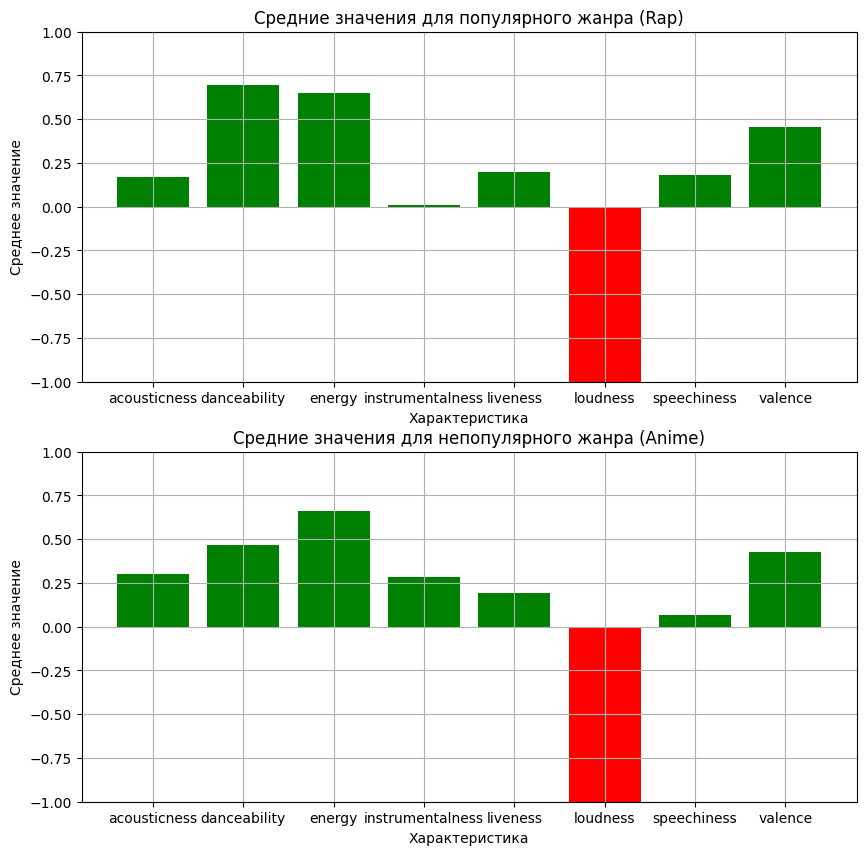

In [16]:
import numpy as np
import matplotlib.pyplot as plt

popular_genres = df.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).head(1)
unpopular_genres = df.groupby('music_genre').mean().sort_values(by='popularity', ascending=False).tail(1)

characteristics = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'valence']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 10))

popular_means = popular_genres[characteristics].values.tolist()[0]
colors_popular = np.where(np.array(popular_means) < 0, 'r', 'g')
axes[0].bar(characteristics, popular_means, color=colors_popular)
axes[0].set_title(f"Средние значения для популярного жанра ({popular_genres.index[0]})")
axes[0].set_ylim([-1, 1])


unpopular_means = unpopular_genres[characteristics].values.tolist()[0]
colors_unpopular = np.where(np.array(unpopular_means) < 0, 'r', 'g')
axes[1].bar(characteristics, unpopular_means, color=colors_unpopular)
axes[1].set_title(f"Средние значения для непопулярного жанра ({unpopular_genres.index[0]})")
axes[1].set_ylim([-1, 1])

# Установить метки осей и заголовки
for ax in axes.flat:
    ax.set(xlabel='Характеристика', ylabel='Среднее значение')
    ax.grid()

plt.show()

**Вывод:**
Построила таблицы для попярного и непопулярного жанров; в отрицательном все значения характеристик положительные, кроме громкости, тогда как в самом популярном отрицательное значение тоже у громкости, инструментальность так же близка к отрицательному значению.

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

In [17]:
import pandas as pd

df['duration_min'] = round(df['duration_ms'] / 60000, 2)
df['duration_category'] = pd.cut(df['duration_min'], bins=[0, 3, 5, float('inf')], labels=['короткая', 'средняя', 'длинная'])

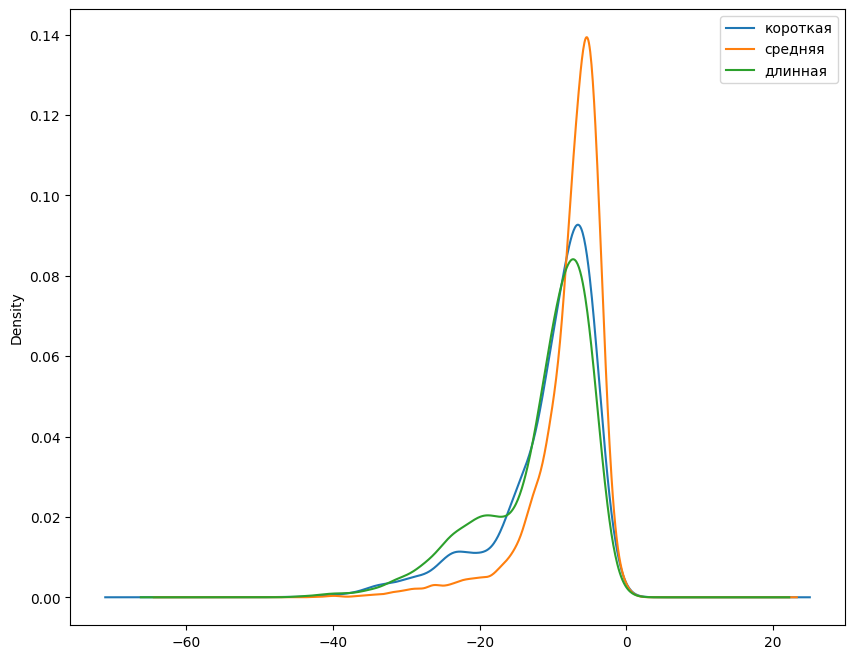

In [18]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
df.groupby('duration_category')['loudness'].plot(kind='density', ax=ax)
plt.legend()
plt.show()

In [39]:
import plotly.express as px

counts = df['duration_category'].value_counts()

fig = px.pie(counts, 
             values=counts.values, 
             names=counts.index, 
             hole=0.5, 
             title='Категоризирование длины треков')
fig.show()

**Вывод:**
 Превалируют треки средней длины, показала численное соотношение длительности треков на круговой диаграмме вида "пончик".

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]